## Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('dataset_tortuga_col.csv')
data_test = pd.read_csv('Data_test.csv')

In [3]:
dataset.columns

Index(['nama_usaha', 'jumlah_menu', 'gambar_menu', 'apakah_menjual_minuman',
       'apakah_menjual_makanan', 'jumlah_review', 'rating',
       'rata-rata_harga_makanan_utama', 'Promo_ongkir(goplus)', 'jam_buka',
       'lokasi', 'rating_gmaps', 'Sosial_media', 'jumlah_ulasan_gmaps',
       'menu_utama', 'durasi_oprasional', 'Kecamantan'],
      dtype='object')

## Create Label

In [4]:
# membuat column baru 'skor_sustainabilitas'
# Nilai_Normal = (Nilai_Asli - Nilai_Minimum) / (Nilai_Maksimum - Nilai_Minimum)
# skor_sustainabilitas = 0.25 * rating norm + 0.25 * jumlah_review norm + 0.25 * rating_gmaps norm + 0.25 * jumlah_ulasan_gmaps norm
dataset['skor_sustainabilitas'] = (
    0.25 * (dataset['rating'] - dataset['rating'].min()) / (dataset['rating'].max() - dataset['rating'].min()) +
    0.25 * (dataset['jumlah_review'] - dataset['jumlah_review'].min()) / (dataset['jumlah_review'].max() - dataset['jumlah_review'].min()) +
    0.25 * (dataset['rating_gmaps'] - dataset['rating_gmaps'].min()) / (dataset['rating_gmaps'].max() - dataset['rating_gmaps'].min()) +
    0.25 * (dataset['jumlah_ulasan_gmaps'] - dataset['jumlah_ulasan_gmaps'].min()) / (dataset['jumlah_ulasan_gmaps'].max() - dataset['jumlah_ulasan_gmaps'].min())
)

data_test['skor_sustainabilitas'] = (
    0.25 * (data_test['rating'] - data_test['rating'].min()) / (data_test['rating'].max() - data_test['rating'].min()) +
    0.25 * (data_test['jumlah_review'] - data_test['jumlah_review'].min()) / (data_test['jumlah_review'].max() - data_test['jumlah_review'].min()) +
    0.25 * (data_test['rating_gmaps'] - data_test['rating_gmaps'].min()) / (data_test['rating_gmaps'].max() - data_test['rating_gmaps'].min()) +
    0.25 * (data_test['jumlah_ulasan_gmaps'] - data_test['jumlah_ulasan_gmaps'].min()) / (data_test['jumlah_ulasan_gmaps'].max() - data_test['jumlah_ulasan_gmaps'].min())
)

In [5]:
## median dari kolom skor_sustainabilitas
median_skor = dataset['skor_sustainabilitas'].median()
print("Median Skor Sustainabilitas:", median_skor)

Median Skor Sustainabilitas: 0.4046072059855149


In [6]:
# mengambil +5 dan -5 dari median
# Tingkat 1 (Sangat Berkelanjutan / Thriving): Skor > 0.45
# Tingkat 2 (Stabil / Stable): Skor antara 0.35 - 0.45
# Tingkat 3 (Rentan / Vulnerable): Skor < 0.35
# ubah kolom skor_sustainabilitas menjadi kolom kategori
def categorize_sustainability(score):
    if score > 0.50:
        return 'Sangat Berkelanjutan'
    elif score > 0.30:
        return 'Stabil'
    else:
        return 'Rentan'

dataset['sustainabilitas'] = dataset['skor_sustainabilitas'].apply(categorize_sustainability)
data_test['sustainabilitas'] = data_test['skor_sustainabilitas'].apply(categorize_sustainability)

C:\Users\Dhinto\AppData\Local\Temp\ipykernel_47972\1012021593.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


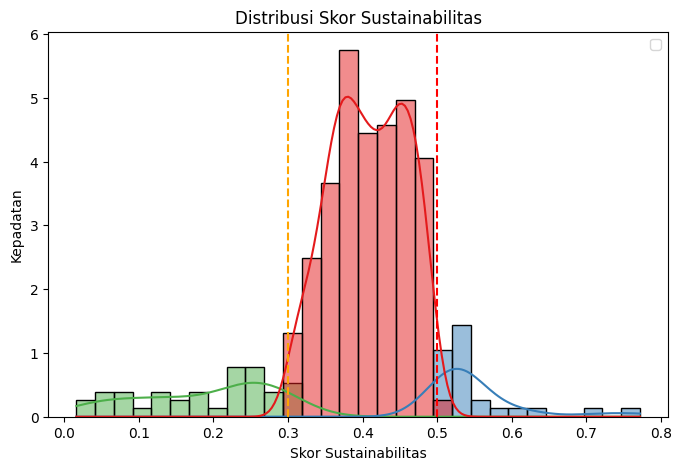

In [7]:
## plot score sustainability
## bedakan warna untuk setiap kategori
# Tingkat 1 (Sangat Berkelanjutan / Thriving): Skor > 0.45
# Tingkat 2 (Stabil / Stable): Skor antara 0.35 - 0.45
# Tingkat 3 (Rentan / Vulnerable): Skor < 0.35

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

# Perbaikan ada di sini
sns.histplot(
    data=dataset,                   # 1. Berikan seluruh DataFrame
    x='skor_sustainabilitas',       # 2. Gunakan nama kolom (string) untuk x
    hue='sustainabilitas',          # 3. Gunakan nama kolom (string) untuk hue
    bins=30,
    kde=True,
    palette='Set1',
    stat='density'
)

plt.axvline(x=0.50, color='red', linestyle='--')
plt.axvline(x=0.30, color='orange', linestyle='--')
plt.title('Distribusi Skor Sustainabilitas')
plt.xlabel('Skor Sustainabilitas')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

In [8]:
dataset.sustainabilitas.value_counts()

sustainabilitas
Stabil                  241
Rentan                   37
Sangat Berkelanjutan     26
Name: count, dtype: int64

In [9]:
dataset.head()

,nama_usaha,jumlah_menu,gambar_menu,apakah_menjual_minuman,apakah_menjual_makanan,jumlah_review,rating,rata-rata_harga_makanan_utama,Promo_ongkir(goplus),jam_buka,lokasi,rating_gmaps,Sosial_media,jumlah_ulasan_gmaps,menu_utama,durasi_oprasional,Kecamantan,skor_sustainabilitas,sustainabilitas
0,"Soto Ayam Madura United, Lodaya",6,Template,Tidak,Ya,100,4.7,Medium,Ya,8:00,Bandung,5.0,Tidak,1.0,Soto,6.0,Lengkong,0.480864,Stabil
1,"Dapoer Pandan Wangi, Patuha",104,Foto_Sendiri,Ya,Ya,12000,4.8,Medium,Tidak,10:00,Bandung,4.5,Ya,9063.0,Berangam,11.0,Lengkong,0.601127,Sangat Berkelanjutan
2,"Bakso Malang Langgeng, Lodaya",76,Foto_Sendiri,Ya,Ya,900,4.9,Low,Ya,10:00,Bandung,4.2,Ya,1136.0,Bakso,12.0,Lengkong,0.448675,Stabil
3,"Ayam Goreng Suharti, Lengkong",130,Foto_Sendiri,Ya,Ya,9000,4.8,High,Ya,8:00,Bandung,4.5,Ya,1668.0,Ayam,12.0,Lengkong,0.546428,Sangat Berkelanjutan
4,"KADAKA Cafe & Resto, Patuha",71,Foto_Sendiri,Ya,Ya,100,4.6,High,Ya,8:00,Bandung,4.7,Ya,475.0,Pizza,12.0,Lengkong,0.454437,Stabil


In [10]:
# drop feature rating, jumlah_review, rating_gmaps, jumlah_ulasan_gmaps, lokasi, dan skor_sustainabilitas
dataset = dataset.drop(columns=['rating', 'jumlah_review', 'rating_gmaps', 'jumlah_ulasan_gmaps', 'skor_sustainabilitas', 'lokasi'])
data_test = data_test.drop(columns=['rating', 'jumlah_review', 'rating_gmaps', 'jumlah_ulasan_gmaps', 'skor_sustainabilitas'])


In [11]:
# simpan column nama_usaha ke dalam variabel nama_usaha
nama_usaha = dataset['nama_usaha']
# drop column nama_usaha
dataset = dataset.drop(columns=['nama_usaha'])

## Data Preprocessing

In [12]:
# split dataset menjadi train dan test
from sklearn.model_selection import train_test_split
X = dataset.drop(columns=['sustainabilitas'])
y = dataset['sustainabilitas']

In [13]:
# print numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_cols)

Numerical columns: ['jumlah_menu', 'durasi_oprasional']


In [14]:
print("Categorical columns:", X.select_dtypes(include=['object']).columns.tolist())

Categorical columns: ['gambar_menu', 'apakah_menjual_minuman', 'apakah_menjual_makanan', 'rata-rata_harga_makanan_utama', 'Promo_ongkir(goplus)', 'jam_buka', 'Sosial_media', 'menu_utama', 'Kecamantan']


In [15]:
dataset['rata-rata_harga_makanan_utama'].value_counts()

rata-rata_harga_makanan_utama
Low          125
Medium       105
High          58
Very High     16
Name: count, dtype: int64

In [16]:
# gunakan ordinal encoding untuk kolom kategorikal rata-rata_harga_makanan_utama dengan urutan harga
#rata-rata_harga_makanan_utama
# Low          125
# Medium       105
# High          58
# Very High     16

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High', 'Very High']])
X['rata-rata_harga_makanan_utama'] = ordinal_encoder.fit_transform(X[['rata-rata_harga_makanan_utama']])

In [17]:
## gunakan lebel encoder untuk kolom menu_utama
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['menu_utama'] = label_encoder.fit_transform(X['menu_utama'])

## gunakan label encoder untuk kolom jam_buka
X['jam_buka'] = label_encoder.fit_transform(X['jam_buka'])


In [18]:
# buat sebuah pipline untuk preprocessing data
# untuk fitur numerik menggunakan MinMaxScaler
# untuk fitur kategorikal menggunakan OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
numerical_features = ['jumlah_menu', 'durasi_oprasional']
categorical_features = ['gambar_menu', 'apakah_menjual_minuman', 'apakah_menjual_makanan', 'Promo_ongkir(goplus)', 'Sosial_media']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)
# buat sebuah pipeline untuk preprocessing data
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

preprocessed_X = pipeline.fit_transform(X)

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# encode target variable
y_encoded = le.fit_transform(y)

In [20]:
# split dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(preprocessed_X, y_encoded, test_size=0.2, random_state=42)

## Modeling

In [21]:
# gunakan modle logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=300, random_state=42)
model.fit(X_train, y_train)
# evaluasi model dengan f1 score
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.6930365468491503


In [22]:
## gunakan model Random Forest untuk multiclass classification
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)
# evaluasi model Random Forest dengan f1 score
y_pred_rf = rf_model.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("F1 Score Random Forest:", f1_rf)

F1 Score Random Forest: 0.7679741323603974


In [23]:
# gunakan model XGBoost untuk multiclass classification

from xgboost import XGBClassifier
from sklearn.metrics import f1_score

xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.03, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)
# evaluasi model XGBoost gunakan f1 score
y_pred_xgb = xgb_model.predict(X_test)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
print("F1 Score XGBoost:", f1_xgb)


F1 Score XGBoost: 0.7415197443035364


In [24]:
## tampilkan top 10 fitur penting dari model XGBoost dan nama fitur tersebut
import matplotlib.pyplot as plt
import xgboost as xgb
# mendapatkan fitur penting dari model XGBoost
importances = xgb_model.feature_importances_
# mendapatkan nama fitur dari preprocessor
feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
# membuat DataFrame untuk fitur penting
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})
# mengurutkan DataFrame berdasarkan pentingnya fitur
importance_df = importance_df.sort_values(by='importance', ascending=False)
# menampilkan 10 fitur terpenting
top_10_features = importance_df.head(10)
print("Top 10 Fitur Penting:")
print(top_10_features)

Top 10 Fitur Penting:
                         feature  importance
13               Sosial_media_Ya    0.142216
1              durasi_oprasional    0.138635
11            Sosial_media_Tidak    0.129098
0                    jumlah_menu    0.126018
9     Promo_ongkir(goplus)_Tidak    0.120736
2       gambar_menu_Foto_Sendiri    0.081120
10       Promo_ongkir(goplus)_Ya    0.079634
12        Sosial_media_Tidak Ada    0.074803
4   apakah_menjual_minuman_Tidak    0.063611
6   apakah_menjual_makanan_Tidak    0.044130


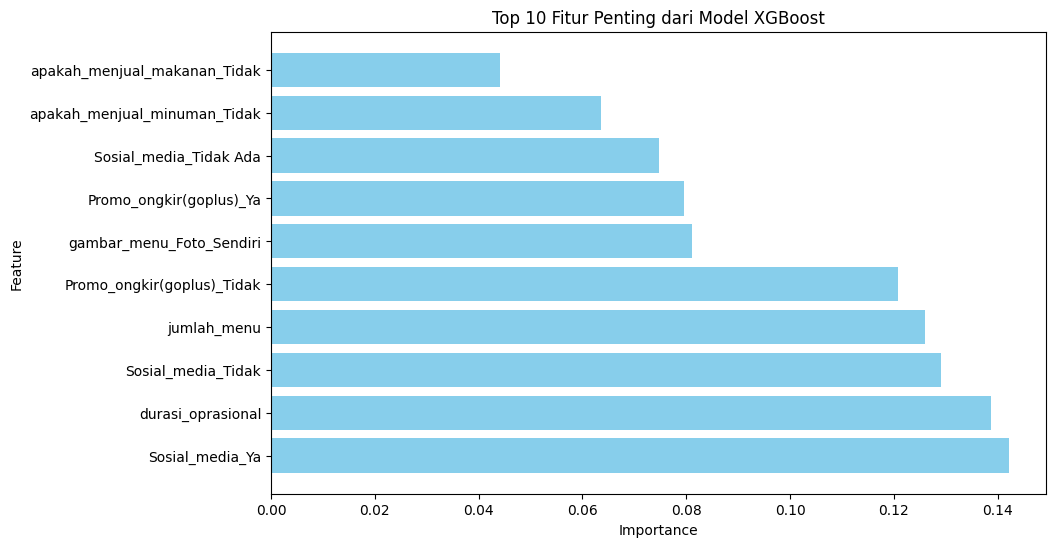

In [25]:
# tolong plot top 10 fitur penting
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['feature'], top_10_features['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Fitur Penting dari Model XGBoost')
plt.show()


In [26]:
# lakukan hyperparameter tuning dengan GridSearchCV model XGBoost
from sklearn.model_selection import GridSearchCV
xgb_model2 = XGBClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.03, 0.1],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(estimator=xgb_model2, param_grid=param_grid, scoring='f1_weighted', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(preprocessed_X, y_encoded)
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 Score: ", grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\Dhinto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dhinto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dhinto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pac

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best F1 Score:  0.701716717332884


In [27]:
# lakukan hyperparameter tuning dengan GridSearchCV dengan model catboost
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
param_grid_catboost = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.03, 0.1],
    'depth': [3, 5, 7]
}
grid_search_catboost = GridSearchCV(estimator=catboost_model, param_grid=param_grid_catboost, scoring='f1_weighted', cv=3, verbose=1, n_jobs=-1)
grid_search_catboost.fit(preprocessed_X, y_encoded)
print("Best parameters found for CatBoost: ", grid_search_catboost.best_params_)
print("Best F1 Score for CatBoost: ", grid_search_catboost.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\Dhinto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dhinto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dhinto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pac

Best parameters found for CatBoost:  {'depth': 3, 'iterations': 300, 'learning_rate': 0.03}
Best F1 Score for CatBoost:  0.7328705197079496


In [28]:
# lakukan hyperparameter tuning dengan GridSearchCV dengan model random forest
from sklearn.model_selection import GridSearchCV
rf_model2 = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(estimator=rf_model2, param_grid=param_grid_rf, scoring='f1_weighted', cv=3, verbose=1, n_jobs=-1)
grid_search_rf.fit(preprocessed_X, y_encoded)
print("Best parameters found for Random Forest: ", grid_search_rf.best_params_)
print("Best F1 Score for Random Forest: ", grid_search_rf.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found for Random Forest:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best F1 Score for Random Forest:  0.7341259719997079


In [29]:
## print hasil dari hyperparameter tuning
print("Best parameters for XGBoost: ", grid_search.best_params_)
print("Best F1 Score for XGBoost: ", grid_search.best_score_)
print("Best parameters for CatBoost: ", grid_search_catboost.best_params_)
print("Best F1 Score for CatBoost: ", grid_search_catboost.best_score_)
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best F1 Score for Random Forest: ", grid_search_rf.best_score_)

Best parameters for XGBoost:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best F1 Score for XGBoost:  0.701716717332884
Best parameters for CatBoost:  {'depth': 3, 'iterations': 300, 'learning_rate': 0.03}
Best F1 Score for CatBoost:  0.7328705197079496
Best parameters for Random Forest:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best F1 Score for Random Forest:  0.7341259719997079


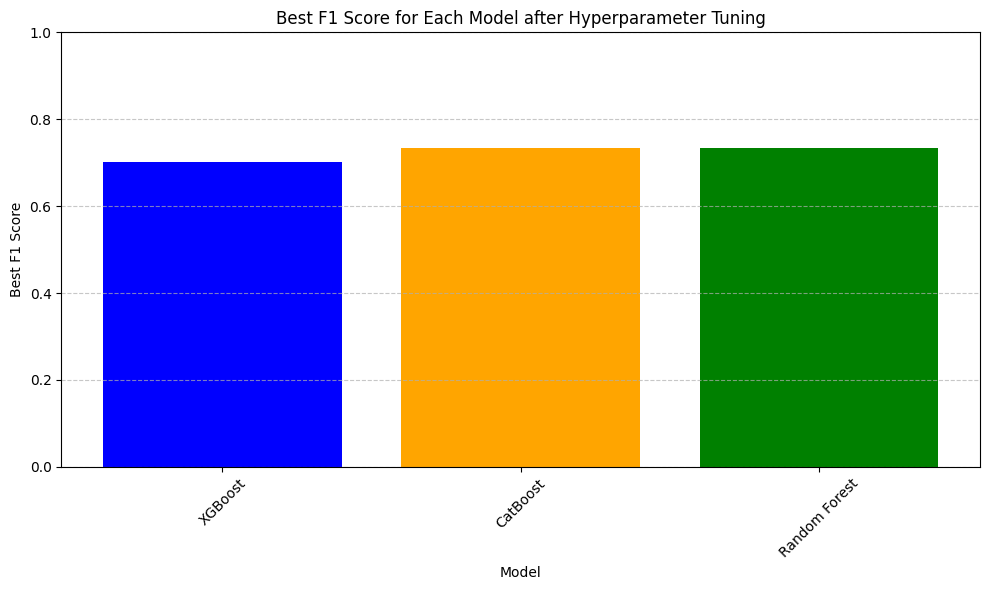

In [30]:
# lakukan ploting dari hasil hyerparameter tuning 3 model catboost, xgboost, dan random forest
import matplotlib.pyplot as plt
import pandas as pd
# Data untuk plot
data = {
    'Model': ['XGBoost', 'CatBoost', 'Random Forest'],
    'Best F1 Score': [
        grid_search.best_score_,
        grid_search_catboost.best_score_,
        grid_search_rf.best_score_
    ]
}
df = pd.DataFrame(data)
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Best F1 Score'], color=['blue', 'orange', 'green'])
plt.title('Best F1 Score for Each Model after Hyperparameter Tuning')
plt.xlabel('Model')
plt.ylabel('Best F1 Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visibility
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [31]:
## lakukan ensemble model dengan voting classifier dengan model XGBoost, Random Forest, dan CatBoost
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(
    estimators=[
        ('xgb', XGBClassifier(n_estimators=300, learning_rate=0.01, max_depth=3, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, min_samples_split=2, max_depth=10)),
        ('catboost', CatBoostClassifier(iterations=200, learning_rate=0.03, depth=5, random_state=42, verbose=0))
    ],
    voting='soft'
)
cv_scores = cross_val_score(voting_model, preprocessed_X, y_encoded, cv=5, scoring='f1_weighted')

print("F1 Score setiap fold:", cv_scores)
print(f"Rata-rata F1 Score Cross-Validation: {np.mean(cv_scores):.4f}")
print(f"Standar Deviasi F1 Score: {np.std(cv_scores):.4f}")


F1 Score setiap fold: [0.69066953 0.77330211 0.75844952 0.6848816  0.74692368]
Rata-rata F1 Score Cross-Validation: 0.7308
Standar Deviasi F1 Score: 0.0362


## 

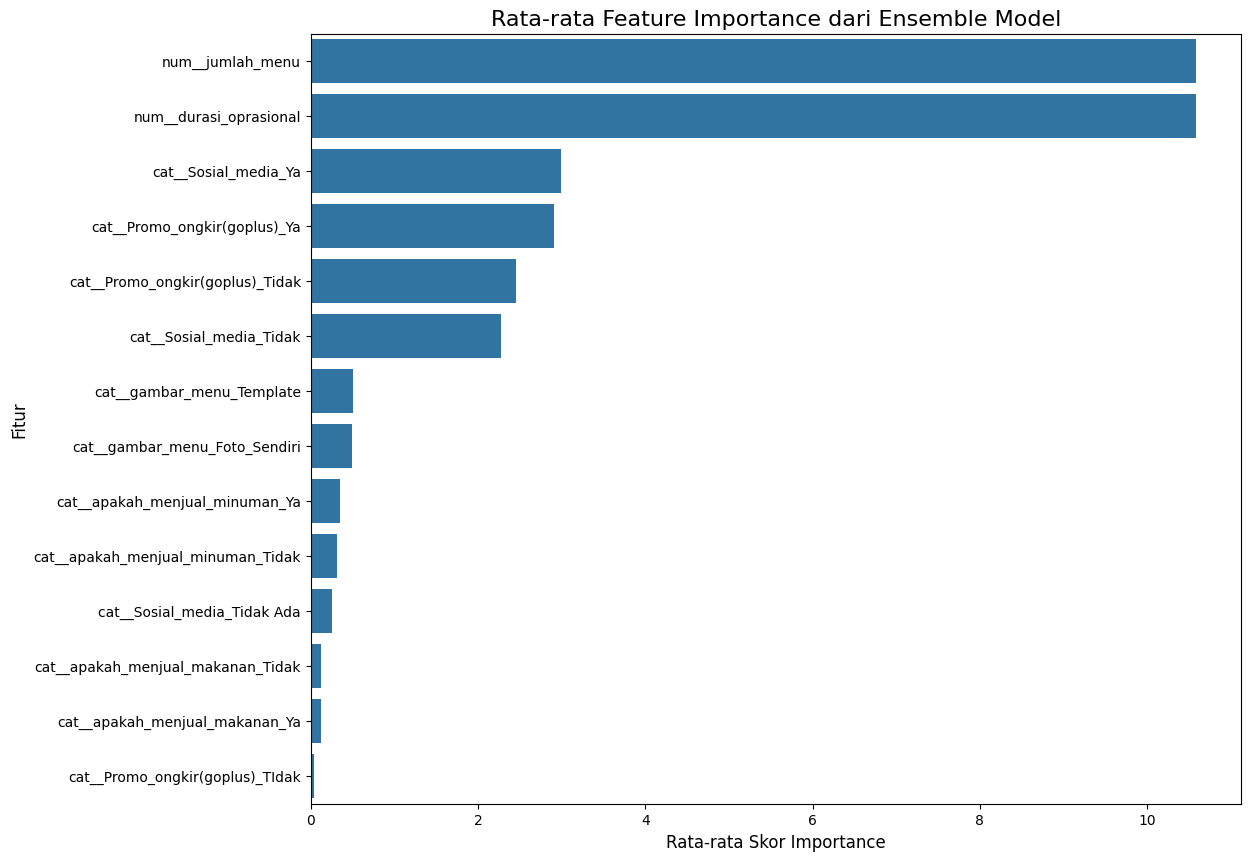

Perbandingan Feature Importance (Top 10):
                              Feature   XGBoost  RandomForest   CatBoost  \
0                    num__jumlah_menu  0.132490      0.459762  31.183997   
1              num__durasi_oprasional  0.128643      0.340856  31.287853   
13               cat__Sosial_media_Ya  0.209005      0.030451   8.722195   
10       cat__Promo_ongkir(goplus)_Ya  0.000000      0.031923   8.709320   
9     cat__Promo_ongkir(goplus)_Tidak  0.095139      0.031501   7.246144   
11            cat__Sosial_media_Tidak  0.211339      0.025680   6.593230   
3           cat__gambar_menu_Template  0.000000      0.018231   1.490365   
2       cat__gambar_menu_Foto_Sendiri  0.052183      0.013711   1.420751   
5      cat__apakah_menjual_minuman_Ya  0.000000      0.015024   1.021446   
4   cat__apakah_menjual_minuman_Tidak  0.036501      0.013638   0.886451   

    Average_Importance  
0            10.592083  
1            10.585784  
13            2.987217  
10            2.91374

In [32]:
voting_model.fit(preprocessed_X, y_encoded)

# 2. Akses setiap model yang sudah dilatih melalui atribut .named_estimators_
xgb_trained = voting_model.named_estimators_['xgb']
rf_trained = voting_model.named_estimators_['rf']
catboost_trained = voting_model.named_estimators_['catboost']

# 3. Dapatkan nama fitur dari preprocessor Anda
#    (Asumsi 'preprocessor' adalah objek ColumnTransformer Anda)
feature_names = preprocessor.get_feature_names_out()

# 4. Buat DataFrame untuk membandingkan feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'XGBoost': xgb_trained.feature_importances_,
    'RandomForest': rf_trained.feature_importances_,
    'CatBoost': catboost_trained.feature_importances_
})

# 5. Hitung rata-rata importance untuk mendapatkan gambaran umum dari ensemble
importance_df['Average_Importance'] = importance_df[['XGBoost', 'RandomForest', 'CatBoost']].mean(axis=1)

# Urutkan berdasarkan rata-rata importance
importance_df = importance_df.sort_values(by='Average_Importance', ascending=False)


# 6. Buat visualisasi dari rata-rata importance
plt.figure(figsize=(12, 10))
sns.barplot(x='Average_Importance', y='Feature', data=importance_df.head(20)) # Tampilkan 20 teratas
plt.title('Rata-rata Feature Importance dari Ensemble Model', fontsize=16)
plt.xlabel('Rata-rata Skor Importance', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.show()

# Tampilkan tabelnya
print("Perbandingan Feature Importance (Top 10):")
print(importance_df.head(10))

## Prediksi

In [33]:
# split data_test menjadi X_test dan y_test
X_test = data_test.drop(columns=['sustainabilitas'])
y_test = data_test['sustainabilitas']

In [34]:
# transform X_test dengan pipeline yang sudah dibuat
preprocessed_X_test = pipeline.transform(X_test)
# transform y_test
y_test_encoded = le.transform(y_test)

In [35]:
# lakukan prediksi lalu menghitung f1 score
y_pred_test = voting_model.predict(preprocessed_X_test)
from sklearn.metrics import f1_score
f1_test = f1_score(y_test_encoded, y_pred_test, average='weighted')
print("F1 Score pada Data Test:", f1_test)

F1 Score pada Data Test: 0.28618421052631576


In [36]:
## save model voting classifier
import joblib
joblib.dump(voting_model, 'voting_classifier_model.pkl')

['voting_classifier_model.pkl']